<h1>Intergrated Project 1 (EDA Notebook)</h1>

<h3>Introduction</h3></br>
&nbsp;&nbsp;&nbsp;&nbsp;Using exploratory data analysis I am going to analyze a dataset of ESRB rated games, their sales from 2016 and, hypthetically, construct common trends to help predict the marketing for 2017 game launches. My goal is to help spot "big winners" for advertising plans.</br>
&nbsp;&nbsp;&nbsp;&nbsp;I will be analyzing preformance of games across platforms and regions of the world, comparing user reviews with professional reviews and overall game sales. I will be comparing those findings to orchastrate a hypotheses and then constructing tests against them. I will be formulating graphs to better visualize the data leaving comments to keep everything organized and easy to read. 

<h2>Preparing the Data</h2>
<h3>Initialization</h3>
<ul><li>importing dependencies for librarys used</li></ul>

In [1]:
import sys
import subprocess

def install(package_name, import_name=None):
    import_name = import_name or package_name
    try:
        __import__(import_name)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

install("pandas")
install("numpy")
install("matplotlib")
install("seaborn")

In [2]:
# Formating and inturpretting the Data
import pandas as pd
import numpy as np
import scipy.stats as st

# Creating and Displaying Interactive Graphs 
import matplotlib.pyplot as plt 
from matplotlib.widgets import CheckButtons 
from ipywidgets import widgets 
from IPython.display import display
import seaborn as sns 

<h3>Cleaning the Data</h3>
<ol>
    <li>Studying and organizing the data</li>
    <li>Converting data-types and reading the information</li>
    <li>Organizing data by year and finding the most relevant period to analyze</li>
</ol>

In [3]:
#--- Reading the Data ---
rawDF = pd.read_csv('datasets/games.csv')
# lowercasing all column names
rawDF.columns = [col.lower() for col in rawDF.columns]

# Handeling missing values and 'tbd'
rawDF['year_of_release'] = rawDF['year_of_release'].fillna('0').astype('int')
    # setting the missing years as 0 allows me to work with the data in a more intuitive, unobstructive, way 
rawDF.loc[rawDF['user_score'] == 'tbd', 'user_score'] = np.nan
    # Setting the to be determined scores as missing values to be handled as such
rawDF['user_score'] = rawDF['user_score'].astype('float')
    # setting all of the userscores to a float to help with calculation later
rawDF['rating'] = rawDF['rating'].fillna('unknown')
    # I was asked to fill the rating column with "unknown" at this early stage of the data (even after handling later)
    
# Adding a "total sales" column to help analyze profitability for each platform/game
rawDF['total_sales'] = rawDF['na_sales'] + rawDF['eu_sales'] + rawDF['jp_sales']    

# splitting the data into the most recent (6 years(double the life of a console after it's peak)) games for a 
# healthy data set of 5277 listings
sortDF = rawDF[rawDF['year_of_release']>=2010]
genres = sortDF['genre'].unique() # Pulling the individual genres from the dataset to be used in graphing

# This will fill the missing "user_scores" and "critic_scores" with the mean of the non-null scores in each genre
genresData = {} # Initializing the Mother Dictionary for the individual Genre Dataframes
for genre in genres:
    # Create a copy of the DataFrame for the current genre
    genreDF = sortDF[sortDF['genre'] == genre].copy()
    
    # Calculate mean of non-null 'user_score' and 'critic_score'
    user_mean = round(genreDF['user_score'].mean(), 1)
    critic_mean = round(genreDF['critic_score'].mean(), 1)
    
    # Fill missing 'user_score' and 'critic_score' with the respective means
    genreDF.loc[:, 'user_score'] = genreDF['user_score'].fillna(user_mean) 
    genreDF.loc[:, 'critic_score'] = genreDF['critic_score'].fillna(critic_mean)
    
    
    # Store the modified DataFrame in the dictionary with genre as the key
    genresData[genre] = genreDF

sortDF = pd.concat(genresData.values(), ignore_index=True)
display(sortDF.sample(20))
sortDF.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
455,National Geographic Challenge!,PS3,2011,Misc,0.01,0.03,0.00,0.01,69.0,6.6,unknown,0.04
3183,Ben 10 Galactic Racing,Wii,2011,Racing,0.08,0.03,0.00,0.01,70.7,6.4,E,0.11
5266,Mechanic Master 2,DS,2010,Puzzle,0.02,0.00,0.00,0.00,71.7,7.1,E,0.02
3231,F1 2010,PC,2010,Racing,0.00,0.05,0.00,0.01,84.0,6.6,E,0.05
2856,Sniper Elite 3,XOne,2014,Shooter,0.20,0.11,0.00,0.03,63.0,6.6,M,0.31
326,Yoostar2,PS3,2011,Misc,0.04,0.04,0.00,0.02,54.0,6.6,T,0.08
2112,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,73.1,7.3,unknown,1.56
1217,Silent Hill HD Collection,X360,2012,Action,0.11,0.06,0.01,0.02,69.0,5.6,M,0.18
4241,WWE '12,X360,2011,Fighting,0.74,0.40,0.00,0.12,71.0,6.3,T,1.14
2012,Bakumatsu Rock,PSP,2014,Action,0.00,0.00,0.01,0.00,68.9,6.8,unknown,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5277 entries, 0 to 5276
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5277 non-null   object 
 1   platform         5277 non-null   object 
 2   year_of_release  5277 non-null   int64  
 3   genre            5277 non-null   object 
 4   na_sales         5277 non-null   float64
 5   eu_sales         5277 non-null   float64
 6   jp_sales         5277 non-null   float64
 7   other_sales      5277 non-null   float64
 8   critic_score     5277 non-null   float64
 9   user_score       5277 non-null   float64
 10  rating           5277 non-null   object 
 11  total_sales      5277 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 494.8+ KB


<h3>Findings</h3>
&nbsp;&nbsp;&nbsp;&nbsp;I used the means of each genre in user_scores and critic scores to have a more tailored generalization and because I noticed the user and critic score weren't heavy indicators on game preformance. I believe the scores are missing by and large because the games are either too old and predate "user_scores" in a reliable way or they're too obscure to have a rating. I also found that the age of a game was a bigger determiner on preformance with a more varying degree of sucess the newer the model. I saw that the life of a console and its games is 3 years from it's peak so I limited the data to the last 6 years to corrolate with that shelf life which still leaves 5277 listings

<h2>Analyzing the Data</h2>
<h3>Grouping the Data</h3>
<ol>
    <li>Group by different factors to understand their affect on sales
        <ul>
            <li>Sales varied per platform (choose platform with the most and build a distribution)</li>
            <li>Selecting several potentially profitable platforms</li>
        </ul>
    </li>
</ol>

In [4]:
# Creating an interactive graph for platform Sales (total and in the different regions) against year of release
platforms = sortDF['platform'].unique()
metric = ['total_sales', 'na_sales', 'eu_sales', 'jp_sales'] # Different categories for the chart

def platformGraph(plat, metric):
    # Sorting through platforms
    pullData = sortDF[sortDF['platform'] == plat]
    
    # Setting Titles Based on Choices
    plt.title(f'{metric.replace("_", " ").title()} per Year for {plat}')
    plt.ylabel(f'{metric.replace("_", " ").title()} (mil $)')
    plt.xlabel('Year of Release')
    
    # Defining the Graph
    plt.grid(True)
    plt.ylim(0, 160)
    
    # Sorting Graph Data and Plotting
    graphData = pullData.groupby('year_of_release')[metric].sum()
    graphData.plot(kind='bar', edgecolor='k', fill=True)
    plt.figure(figsize=(10, 6))
    
    # Printing total sold and standard deviation on this platform for this metric
    print(f'{metric.replace("_"," ")}: {pullData[metric].sum()}')
    print(f'{plat} {metric.replace("_"," ")} std: {np.std(pullData[metric])}')
    
    plt.show()

plat_drop = widgets.Dropdown(options=platforms, description='Platform:')
met_drop = widgets.Dropdown(options=metric, description='Metric:')

interact_widget = widgets.interact(platformGraph, plat=plat_drop, metric=met_drop)
display(interact_widget)

interactive(children=(Dropdown(description='Platform:', options=('X360', 'Wii', 'PS3', 'WiiU', 'PS4', 'XOne', …

<function __main__.platformGraph(plat, metric)>

<h3>Graphing Scores and Calculating impact on Sales</h3> 
<ol>
    <li>Scatter Plot calculating correlation between reviews and sales</li>
    <li>Box Plot for Global Sales broken down by platform.</li>
</ol>

In [5]:
# Converting scores to Readable format
sortDF['user_score'] = pd.to_numeric(sortDF['user_score'], errors='coerce')
sortDF['critic_score'] = pd.to_numeric(sortDF['critic_score'], errors='coerce')

# Creating a Scatter Plot Showing the distribution of sales against User Score and Critic Score
def scatGraph(plat):
    # Pulling Matching Data from Dataframe
    pulledData = sortDF[sortDF['platform'] == plat]
    
    # Setting Titles based on Choices
    plt.title(f'{plat} Scores versus Sales')
    plt.ylabel('Sales (mil$)')
    plt.xlabel('Score')
    plt.legend(('User Score x10', 'Critic Score'))
    
    # Calculating figures for the Scatter Plots
    x_user = np.array(pulledData['user_score'])
    x_critic = np.array(pulledData['critic_score'])
    y = np.array(pulledData['total_sales'])
    
    # Graphing the Plots
    plt.scatter((x_user*10), y)
    plt.scatter(x_critic, y)
    plt.figure(figsize=(10,6))
    
    # Displaying Coefficents and Standard Deviations
    display('User Coefficient ' + str(round(pulledData['user_score'].corr(pulledData['total_sales']), 2)))
    print(f'User Standard Deviation: {np.std(pulledData["user_score"])}')
    display('Critic Coefficient ' + str(round(pulledData['critic_score'].corr(pulledData['total_sales']), 2)))
    print(f'Critic Standard Deviation: {np.std(pulledData["critic_score"])}')
    
    # Showing the missing ratings in each platform
    missing_ratings = pulledData['rating'].value_counts().get('unknown', 0)
    display(f'Number of Games with Unknown Ratings: {missing_ratings}')

    # Showing the Plot
    plt.show()
    
interact_widget = widgets.interact(scatGraph, plat=plat_drop)

interactive(children=(Dropdown(description='Platform:', options=('X360', 'Wii', 'PS3', 'WiiU', 'PS4', 'XOne', …

In [6]:
def genAllGraphs(metric):
    # Creating a Boxplot over sales from all games for each platform
    num_genres = len(genresData)

    cols = 3  # Number of columns
    rows = (num_genres + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()  

    # Create a box plot for each genre
    for idx, (genre, data) in enumerate(genresData.items()):
        currentDF = data
        print(f'{genre}:{currentDF[metric].sum()}') # For refrencing later during analysis
        axes[idx].boxplot(currentDF[metric], showfliers=False)
        axes[idx].set_title(genre)
        axes[idx].set_xlabel('Games')
        axes[idx].set_ylabel('Total Sales (mil$)')

    # Hide any unused subplots
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

met_drop
print('Total sales amounts based on chosen metric. Written in $mil')
interact_widgets = widgets.interact(genAllGraphs, metric=met_drop)

Total sales amounts based on chosen metric. Written in $mil


interactive(children=(Dropdown(description='Metric:', options=('total_sales', 'na_sales', 'eu_sales', 'jp_sale…

<h3>Comparing Games and Genres</h3>
<ol>    
    <li>Compare same games between platforms</li>
    <li>Most profitable Genres</li>
</ol>

In [7]:
# Generating a list of all duplicate games over different platforms
names = [name for temp, name in sortDF.groupby('name')]
duplicates = []
for df in names:
    df['rating'] = df['rating'].transform(lambda x: x.ffill().bfill())
    if len(df) > 1:
        # Gathering only the name of the game, its sales, the platform, and its ESRB Rating
        duplicates.append(df) 
dupDF = pd.concat(duplicates, ignore_index=True)
display(sortDF.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,20.13
1,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+,9.06
2,Just Dance 2,Wii,2010,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+,8.66
3,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,69.0,6.6,unknown,8.37
4,Wii Party,Wii,2010,Misc,1.75,3.47,2.49,0.67,68.0,7.4,E,7.71
5,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,6.21
6,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,69.0,6.6,unknown,4.40
7,Nintendo Land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77.0,7.9,E10+,4.09
8,Michael Jackson: The Experience,Wii,2010,Misc,2.64,1.33,0.01,0.39,56.0,8.3,E10+,3.98
9,Minecraft,PS4,2014,Misc,1.48,2.02,0.14,0.68,69.0,6.6,unknown,3.64


In [8]:
# grabbing the top 5 games that were released on multiple platforms
topGames = dupDF.sort_values('total_sales', ascending=False).iloc[:7, :7] # 7 because of cross platform hits
topUnique = topGames['name'].unique()

topTenList = []

# pulling each iteration of the top games from the whole dataset
for _, row in dupDF.iterrows():
    if row['name'] in topUnique:
        topTenList.append(row[['name', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales', 'platform', 'rating']])
        
topTenGames = pd.DataFrame(topTenList)
topPlat = topTenGames['platform'].unique()

x360 = []
ps3 = []
wii = []
ds = []
ps4 = []
xone = []
pc = []
wiiu = []

for _, game in topTenGames.iterrows():
    if game['platform'] == 'X360':
        x360.append(game)
    elif game['platform'] == 'PS3':
        ps3.append(game)
    elif game['platform'] == 'Wii':
        wii.append(game)
    elif game['platform'] == 'DS':
        ds.append(game)
    elif game['platform'] == 'PS4':
        ps4.append(game)
    elif game['platform'] == 'XOne':
        xone.append(game)
    elif game['platform'] == 'PC':
        pc.append(game)
    else:
        wiiu.append(game)

x360 = pd.DataFrame(x360)
ps3 = pd.DataFrame(ps3)
xone = pd.DataFrame(xone)
ps4 = pd.DataFrame(ps4)
wii = pd.DataFrame(wii)
wiiu = pd.DataFrame(wiiu)
ds = pd.DataFrame(ds)
pc = pd.DataFrame(pc)

# Created an interactive graph to help with analysis later, this is top games divided by platform for regions
def platEDAGraph(metric):
    
    #Setting the graph
    plt.figure(figsize=(10,6))
    
    # Each of these bar graphs are another platform I want displayed on the final chart
    plt.bar(x360['name'], x360[metric]) 
    plt.bar(ps3['name'], ps3[metric])
    plt.bar(wii['name'], wii[metric])
    plt.bar(xone['name'], xone[metric])
    plt.bar(ps4['name'], ps4[metric])
    plt.bar(wiiu['name'], wiiu[metric])
    plt.bar(pc['name'], pc[metric])
    plt.bar(ds['name'], ds[metric])

    # This is so we can actually read the titles 
    plt.xticks(np.arange(len(topUnique)), topUnique) 
    plt.xlabel("Games") 
    plt.ylabel("Total Sales ($mil)") 
    plt.title("Top selling games Across All Avaliable Platforms") 
    plt.legend(topPlat) 
    plt.xticks(rotation=45)
    
    plt.show()
    
# Interactive dropdown which changes the graphs throughout the whole notebook
met_drop

interact_widget = widgets.interact(platEDAGraph, metric=met_drop)
display(interact_widget)

interactive(children=(Dropdown(description='Metric:', options=('total_sales', 'na_sales', 'eu_sales', 'jp_sale…

<function __main__.platEDAGraph(metric)>

In [9]:
# Generating Chart to show profitability based on a specific region and genre
def genGraph(genre, metric):
    # Setting selected Data from DataFrame
    genPull = genresData[genre]

    # Setting Titles based on Choices
    plt.title(f'{genre} Games for {metric.replace("_", " ")}')
    plt.ylabel('Sales (mil$)')
    plt.xlabel('Games')

    # Ploting Graph
    plt.boxplot(genPull[metric], showfliers=False)
    plt.show()

gen_drop = widgets.Dropdown(options=genres, description='Genre:')
met_drop
interact_widget = widgets.interact(genGraph, genre=gen_drop, metric=met_drop)
display(interact_widget)

interactive(children=(Dropdown(description='Genre:', options=('Misc', 'Action', 'Role-Playing', 'Shooter', 'Ra…

<function __main__.genGraph(genre, metric)>

<h3>Findings and Results</h3>
&nbsp;&nbsp;&nbsp;&nbsp;As you can explore from the bar graph above, the Xbox 360 is on its way out by 2016, along with the PS3. Both of which have their counterpart (the Xbox One and the PS4 respectfully) on the above and raising sales. It would make the most sense to prioritize games on these consoles moving forward simply because they make the most money with the fewest amount of games. The PS2, PSV, DS, PSP, Wii, and WiiU are preforming poorly, several with no sales in the last 3 years completely.</br>
&nbsp;&nbsp;&nbsp;&nbsp;As you can see by the Scatter Plots above, games which sold poorly have varying degress of critical and user reviews. Critical reviews having the most variance in their ratings, it is fair to say that games which made a lot of money much more often have postive reviews but the correlation is weak between that and sales (0.31 being the highest for user_reviews and 0.37 for critc_reviews). Based off the box plots several genres have much more variance in their preformance with the common sales amongst all genres making less than $1 million globally. Shooter games having the greater liklihood to out preform the other genres.</br>
&nbsp;&nbsp;&nbsp;&nbsp;At this point, based on these findings, I would suggest we prioritize our focus on Xbox One and PS4 Shooter and Action Games for 2017. The conclusion at the end will have a more comprehensive plan.

<h2>Comparing Specifics and Regions</h2>
<h3>Updating DataFrames to tailor to a more specific scope</h3>
<ol>
    <li>Updating ratings to have cross Platform fill-in's for missing info.</li>
    <li>Does the ESRB affect Sales in Individual regions?</li>
</ol>

In [10]:
#--- Updating Dataframe with Ratings across Platforms ---
# Creating a copy of the DataFrame to preserve the original data and Cleaning dupDF
modData = sortDF.copy()
dupDF = dupDF.drop_duplicates(subset=['name', 'platform'])

# Selecting necessary columns from dupDF to merge
smallDupDF = dupDF[['name', 'platform', 'rating']]

# Merging the updated ratings back into sortDF
modData = pd.merge(
    modData, 
    smallDupDF, 
    on=['name', 'platform'], 
    how='left', 
    suffixes=('', '_updated')
)

# Replace the old rating column with the updated one where available
modData['rating'] = modData['rating_updated'].combine_first(modData['rating'])

# Drop the temporary 'rating_updated' column
modData.drop(columns=['rating_updated'], inplace=True)

In [11]:
# getting total sales across all platforms into a single dataframe with one entry per game 
aggregate_functions = {
    'total_sales': 'sum',
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'rating': 'first'
}
crossPlatSales = dupDF.groupby('name').agg(aggregate_functions).reset_index()

#---Merging crossPlatSales back into the DataFrame to have a single instance of game sales across ALL platforms---
# Cleaning sortDF
duplicates = modData['name'][modData.duplicated(subset=['name'], keep=False)].unique()
duplicatesDF = modData[modData['name'].isin(duplicates)].copy()
uniqueDF = modData[~modData['name'].isin(duplicates)].copy()

# Merging together
crossPlatDF = pd.concat([uniqueDF[['name','total_sales','na_sales','eu_sales','jp_sales','rating']], crossPlatSales], ignore_index=True)

In [12]:
# I found myself updating this chart a lot so I just made it interactive to help me out
def finalEDAGraph(metric):
    ESRBData = crossPlatDF.sort_values(metric, ascending=False)[['name', 'rating', metric, 'total_sales']]
    display(ESRBData.head(10))
met_drop
interact_widget = widgets.interact(finalEDAGraph, metric=met_drop)
display(interact_widget)

interactive(children=(Dropdown(description='Metric:', options=('total_sales', 'na_sales', 'eu_sales', 'jp_sale…

<function __main__.finalEDAGraph(metric)>

<h3>Understanding Regions and Creating User Profile</h3>
<ol>
    <li>Creating a user profile for each region (NA, EU, JP) to determine:
        <ul>
            <li>Top Five Platforms</li>
            <li>Top Five Genres</li>
            <li>Does the ESRB affect sales</li>
        </ul>
    </li>
</ol>

<h4>User Profiles by Region</h4>
<h5>North American (NA)</h5>
&nbsp;&nbsp;&nbsp;&nbsp;North American gamers are focused on Fast AAA title games with little regard to ESRB ratings. 7 of the top 10 top selling titles are rated M. 5 being from the same franchise, with Grand Theft Auto 5 and Skyrim, both of which are well established brands. 2 of the top 10 do not fit into this mold but one is an Xbox exclusive which promised good health and better connectivity and another is Minecraft which found several new homes and more usability in 2016. </br>
User Profile:
<ul>
    <li>Top Five Platforms (based off overall total sales for 2016)
        <ol>
            <li>Xbox 360 : &dollar;334.18 mil</li>
            <li>PlayStation 3 : &dollar;229.25 mil</li>
            <li>Wii : &dollar;121.20 mil</li>
            <li>PlayStation 4 : &dollar;108.74 mil</li>
            <li>Xbox One : &dollar;93.12 mil</li>
        </ol>
    </li>
    <li>Top Five Genres (Where the smallest of the 5 is greater than the largest of japan genre sales, and almost double the smallest EU)
        <ol>
            <li>Action : &dollar;290.64 mil</li>
            <li>Shooter &dollar;237.47 mil</li>
            <li>Sports : &dollar;156.81 mil</li>
            <li>Misc : &dollar;123.80 mil</li>
            <li>Role-Playing : &dollar;112.05 mil</li>
        </ol>
    </li>   
</ul>
<h5>European (EU)</h5>
&nbsp;&nbsp;&nbsp;&nbsp;Europe follows several trends as North Americans but has a more tempered approach and attitude towards games. The overall sales is greater than japan by a large margin but doesn't approach the level of money north americans spend on games. I don't know how much of an impact the ESRB rating had on people choosing to buy FIFA games but 4 out of the top 10 are in that franchise and with Minecraft being included there are half of the top ten games being family friendly; It is hard to argue that that is simply a coincidence.</br>
User Profile:
<ul>
    <li>Top Five Platforms (based off overall total sales for 2016)
        <ol>
            <li>PlayStation 3 : &dollar;213.60 mil</li>
            <li>Xbox 360 : &dollar;163.41 mil</li>
            <li>PlayStation 4 : &dollar;141.09 mil</li>
            <li>Personal Computer : &dollar;68.82 mil</li>
            <li>Wii : &dollar;65.91 mil</li>
        </ol>
    </li>
    <li>Top Five Genres
        <ol>
            <li>Action : &dollar;233.63 mil</li>
            <li>Shooter : &dollar;171.45 mil</li>
            <li>Sports : &dollar;116.84 mil</li>
            <li>Role-Playing : &dollar;75.48 mil</li>
            <li>Misc : &dollar;66.09 mil</li>
        </ol>
    </li>
</ul>
<h5>Japan (JP)</h5>
&nbsp;&nbsp;&nbsp;&nbsp;The Japanese people have the most minimalist attitude towards purchasing new games within this dataset. They have the lowest numbers in every metric and their top games, platforms, and genres are very different from the NA and EU customers. Their choices would lead you to believe they are very sensitive to what they choose to buy and therefore I would believe the ESRB weighs heavy on their decsion to purchase a new game. In fact, based off this dataset I would assume several things factor into their decsion to investing time and money into this hobby.</br>
User Profile:
<ul>
    <li>Top Five Platforms (based off overall total sales for 2016)
        <ol>
            <li>Nintendo 3DS : &dollar;100.62 mil</li>
            <li>PlayStation 3 : &dollar;59.26 mil</li>
            <li>PlayStation Portable : &dollar;42.20 mil</li>
            <li>Nintendo DS : &dollar;27.90 mil</li>
            <li>PlayStation Vita : &dollar;21.84 mil</li>
        </ol>
    </li>
    <li>Top Five Genres
        <ol>
            <li>Role-Playing : &dollar;103.54 mil</li>
            <li>Action : &dollar;72.20 mil</li>
            <li>Misc : &dollar;24.29 mil</li>
            <li>Platform : &dollar;15.81 mil</li>
            <li>Adventure : &dollar;15.67 mil</li>
        </ol>
    </li>
</ul

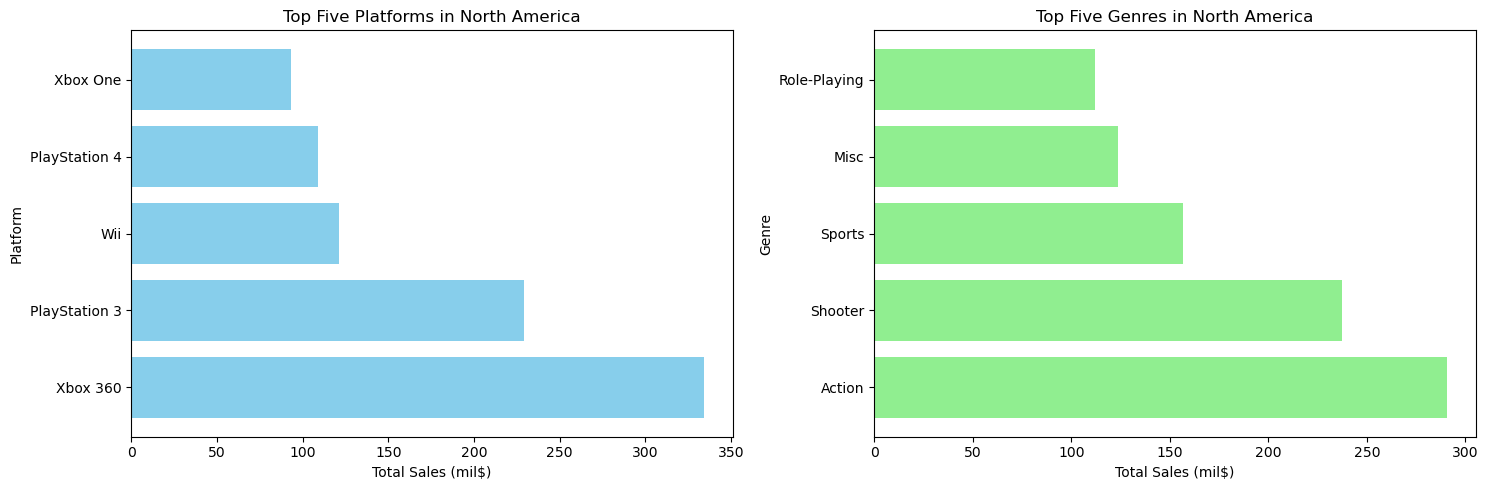

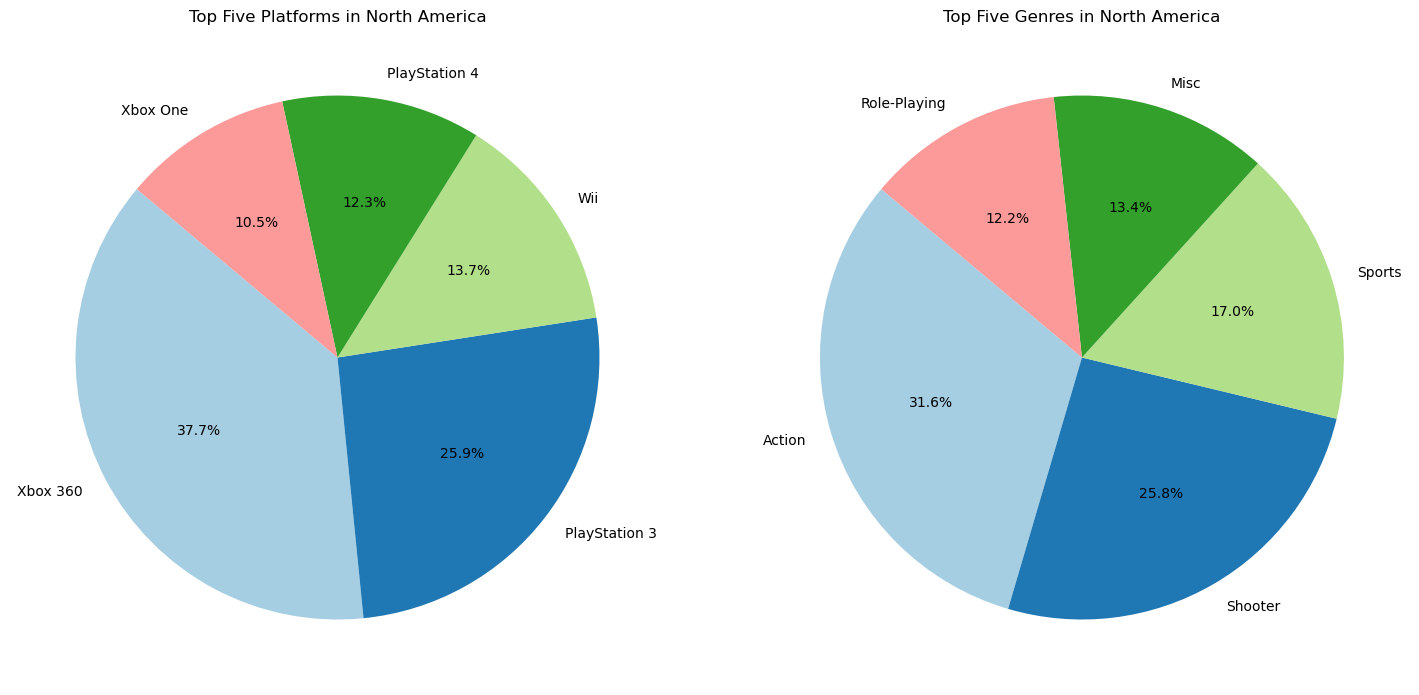

In [13]:
# --- Visualization for the North American User Profile ---
# Define the data
platforms = ['Xbox 360', 'PlayStation 3', 'Wii', 'PlayStation 4', 'Xbox One']
sales_platforms = [334.18, 229.25, 121.20, 108.74, 93.12]

genres = ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing']
sales_genres = [290.64, 237.47, 156.81, 123.80, 112.05]

# Creating Bar Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting platforms
ax1.barh(platforms, sales_platforms, color='skyblue')
ax1.set_title('Top Five Platforms in North America')
ax1.set_xlabel('Total Sales (mil$)')
ax1.set_ylabel('Platform')

# Plotting genres
ax2.barh(genres, sales_genres, color='lightgreen')
ax2.set_title('Top Five Genres in North America')
ax2.set_xlabel('Total Sales (mil$)')
ax2.set_ylabel('Genre')

# Showing Bar Charts
plt.tight_layout()
plt.show()

#Creating Pie Charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Platform Pie Chart
ax1.pie(sales_platforms, labels=platforms, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax1.set_title('Top Five Platforms in North America')

# Genre Pie Chart
ax2.pie(sales_genres, labels=genres, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax2.set_title('Top Five Genres in North America')

# Show Pie Charts
plt.tight_layout()
plt.show()

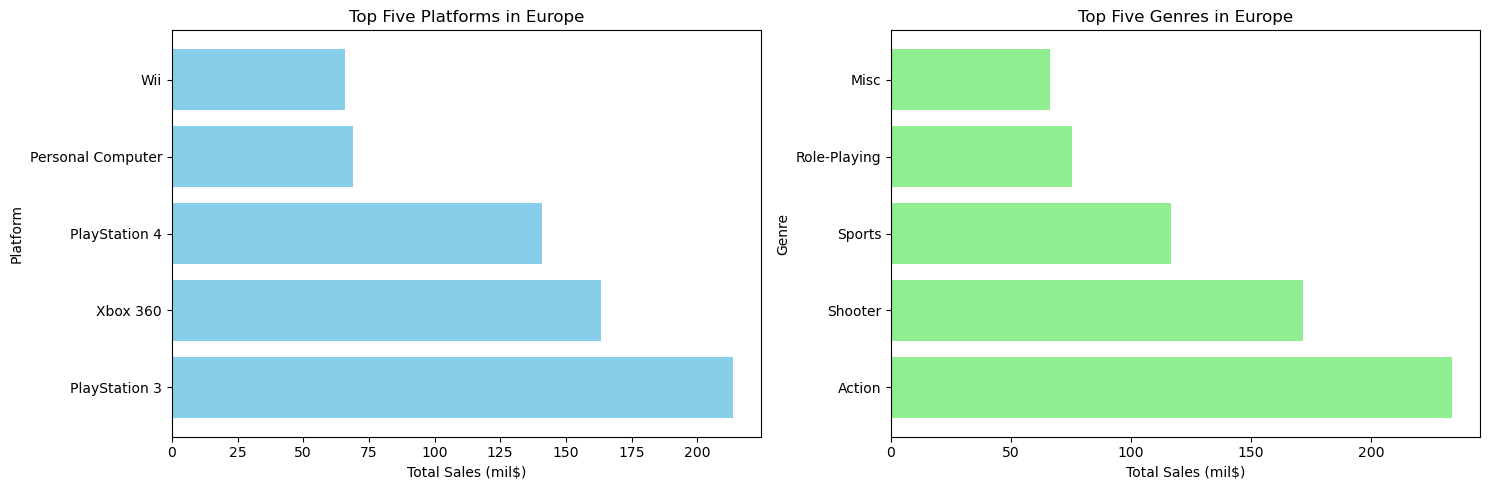

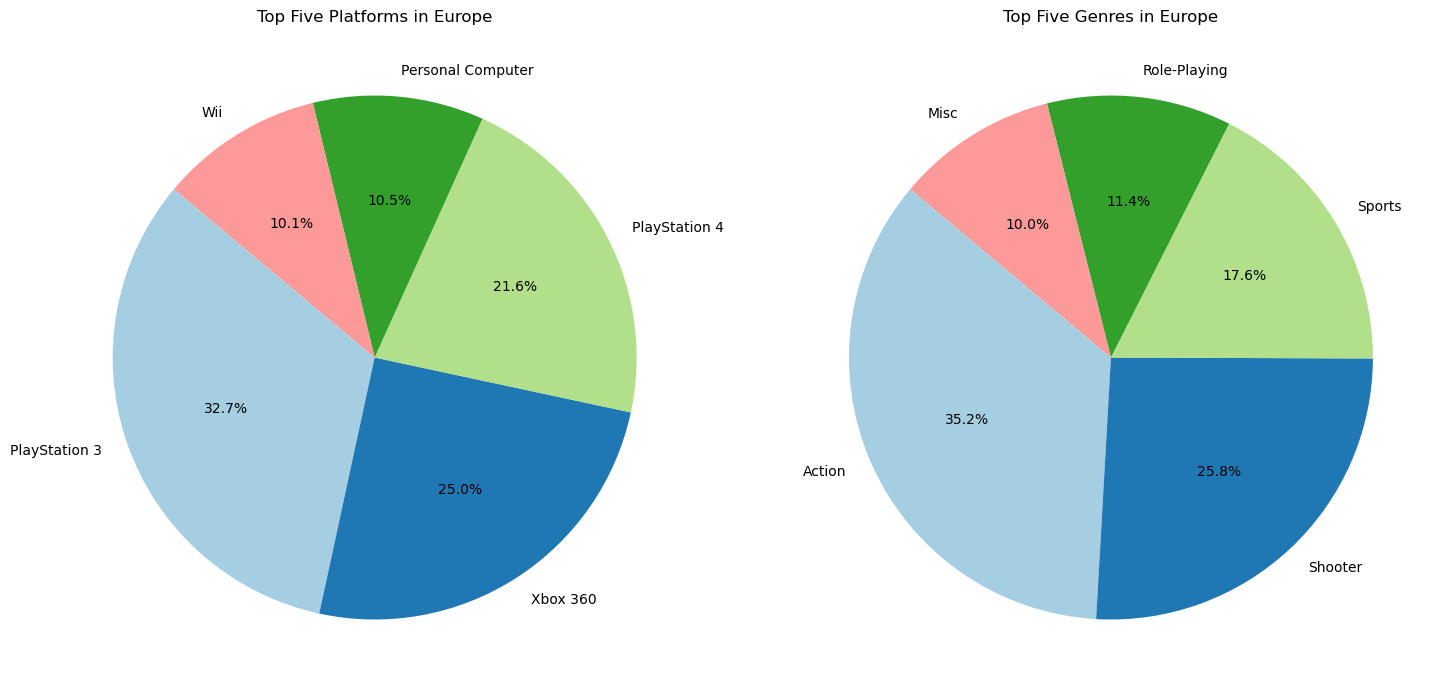

In [14]:
# --- Visualization for the European User Profile ---
# Define the data
platforms = ['PlayStation 3', 'Xbox 360', 'PlayStation 4', 'Personal Computer', 'Wii']
sales_platforms = [213.60, 163.41, 141.09, 68.82, 65.91]

genres = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
sales_genres = [233.63, 171.45, 116.84, 75.48, 66.09]

# Creating Bar Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting platforms
ax1.barh(platforms, sales_platforms, color='skyblue')
ax1.set_title('Top Five Platforms in Europe')
ax1.set_xlabel('Total Sales (mil$)')
ax1.set_ylabel('Platform')

# Plotting genres
ax2.barh(genres, sales_genres, color='lightgreen')
ax2.set_title('Top Five Genres in Europe')
ax2.set_xlabel('Total Sales (mil$)')
ax2.set_ylabel('Genre')

# Showing Bar Charts
plt.tight_layout()
plt.show()

#Creating Pie Charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Platform Pie Chart
ax1.pie(sales_platforms, labels=platforms, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax1.set_title('Top Five Platforms in Europe')

# Genre Pie Chart
ax2.pie(sales_genres, labels=genres, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax2.set_title('Top Five Genres in Europe')

# Show Pie Charts
plt.tight_layout()
plt.show()

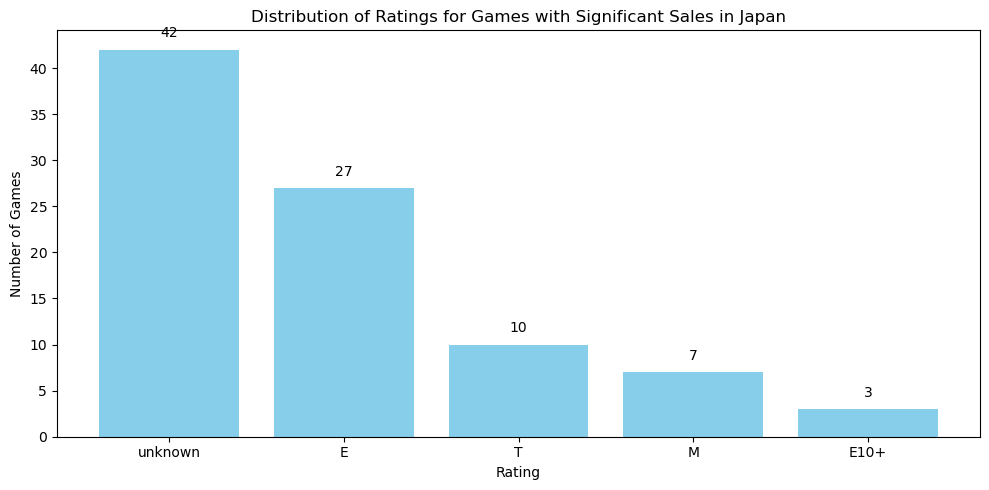

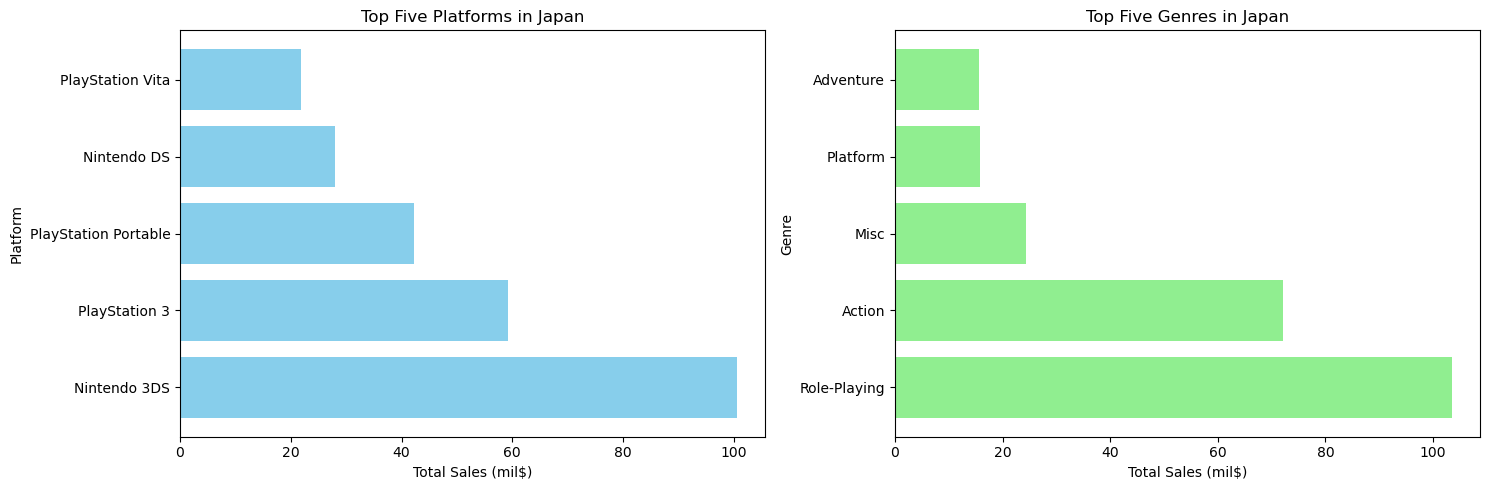

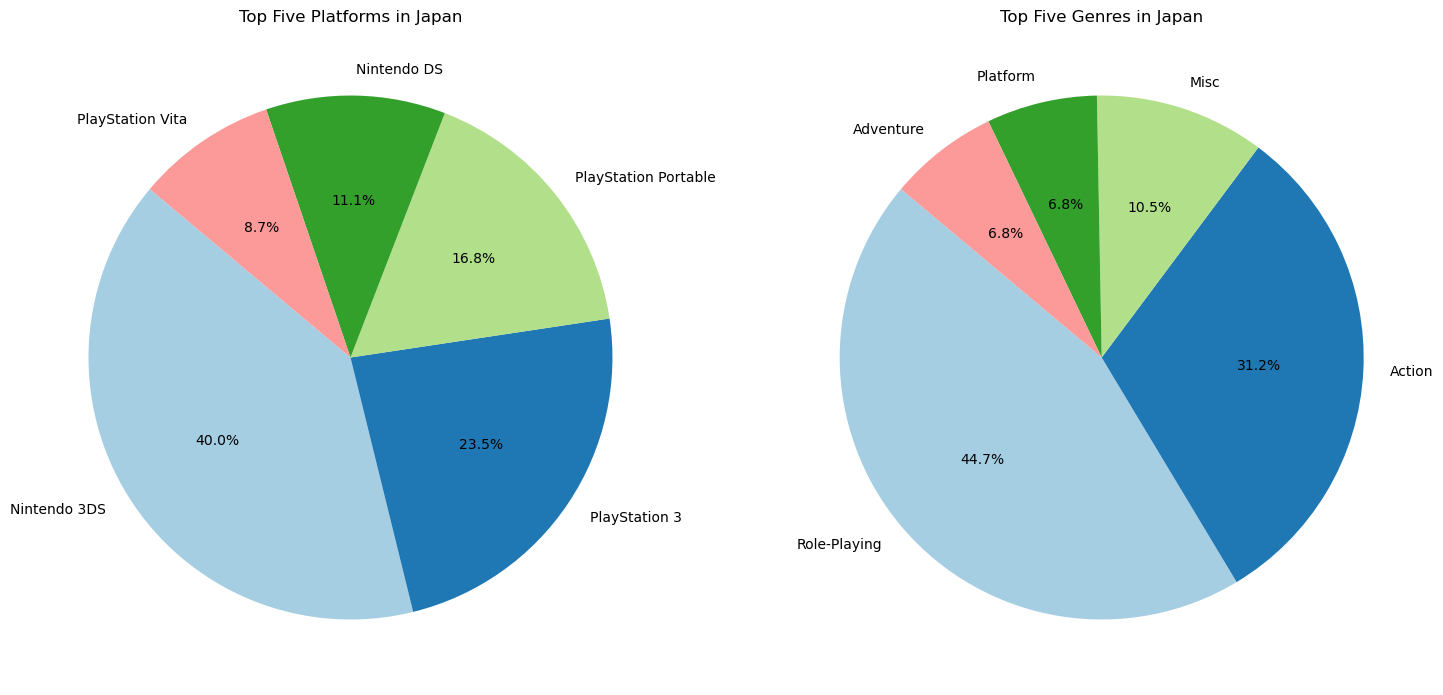

In [15]:
# --- Visualization for the Japan User Profile ---
# Threshold to define significant sales
sales_threshold = 0.5  # Adjust as required

# Filter games with significant sales in Japan
significant_japan_sales = modData[modData['jp_sales'] > sales_threshold]

# Aggregate ratings for games with significant sales in Japan
japan_ratings = significant_japan_sales['rating'].value_counts()

# Visualizing the Rating Distribution
plt.figure(figsize=(10, 5))
plt.bar(japan_ratings.index, japan_ratings.values, color='skyblue')
plt.title('Distribution of Ratings for Games with Significant Sales in Japan')
plt.xlabel('Rating')
plt.ylabel('Number of Games')

# Annotate counts on bars
for i, count in enumerate(japan_ratings.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Define the data
platforms = ['Nintendo 3DS', 'PlayStation 3', 'PlayStation Portable', 'Nintendo DS', 'PlayStation Vita']
sales_platforms = [100.62, 59.26, 42.20, 27.90, 21.84]

genres = ['Role-Playing', 'Action', 'Misc', 'Platform', 'Adventure']
sales_genres = [103.54, 72.20, 24.29, 15.81, 15.67]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot for platforms
ax1.barh(platforms, sales_platforms, color='skyblue')
ax1.set_title('Top Five Platforms in Japan')
ax1.set_xlabel('Total Sales (mil$)')
ax1.set_ylabel('Platform')

# Plot for genres
ax2.barh(genres, sales_genres, color='lightgreen')
ax2.set_title('Top Five Genres in Japan')
ax2.set_xlabel('Total Sales (mil$)')
ax2.set_ylabel('Genre')

# Show plots
plt.tight_layout()
plt.show()

# Pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Platform Pie Chart
ax1.pie(sales_platforms, labels=platforms, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax1.set_title('Top Five Platforms in Japan')

# Genre Pie Chart
ax2.pie(sales_genres, labels=genres, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax2.set_title('Top Five Genres in Japan')

# Show plots
plt.tight_layout()
plt.show()


<h3>Preliminary EDA Conclusions</h3>
&nbsp;&nbsp;&nbsp;&nbsp;I stand by my overall assessments of the different regions and I found several interesting data points. Europeans having personal computer on their top 5 platforms was a shock, at number 4 no less, but it opens a deeper understanding of that audiance. Japan, who has always seemed like a video-game enthusiastic culture was by far the weakest of the three, in several graphs the Japanese sales numbers are just simply not there.</br>
&nbsp;&nbsp;&nbsp;&nbsp;My recommendation would be to focus on the North American and European markets, focusing on trends and paying attention to the "safe bets"(large franchises, anticipated sequels, etc.). With a North American venture being some "next-level" AAA title that is fast and action-orientated. Branching out into the european client base I would recommend aiming for a family-friendly action based Sony driven experience. Trying to cross the two approaches may be damaging as north americans may find any title that's safe enough for big numbers with a european audiance too boring or slow.   

<h2>Statistical Analysis</h2>
<h3>Defining and Testing Hypotheses</h3>
<ol>
    <li>"Average user ratings of the Xbox One and PC Platforms are the same"</li>
    <li>"Average user ratings for the Action and Sports Genres are different"</li>
    <ul>
        <li>Set the Alpha Threshold Value</li>
        <li>Explain how the null and alternative hypotheses were formulated</li>
        <li>Explain what significance level was chosen to test the hypotheses and why</li>
    </ul>
</ol>

In [16]:
# --- Formulating and Testing a null hypotheses that Xbox One and PC Platforms are the same ---

# Setting variables
user_xone = modData.loc[modData['platform']=='XOne', 'user_score'].dropna()
user_pc = modData.loc[modData['platform']=='PC', 'user_score'].dropna()

# Using an independent test to test independent variables
results = st.ttest_ind(user_xone, user_pc, equal_var=False)

# Having a 10% margin makes sense to me to handle any outliers in the Data and get an accurate answer
alpha = 0.1

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
    print("The user ratings for Xbox One and PC platforms are significantly different")
else:
    print("We can't reject the null hypothesis")
    print("We cannot conclude that the user ratings for Xbox One and PC platforms are significantly different")


p-value:  0.9627460115445088
We can't reject the null hypothesis
We cannot conclude that the user ratings for Xbox One and PC platforms are significantly different


In [17]:
# --- Formulating and Testing a null hypothesis that user ratings for the Action and Sports Genres are the Same --

# Setting Variables
user_action = modData.loc[modData['genre']=='Action', 'user_score'].dropna()
user_sport = modData.loc[modData['genre']=='Sports', 'user_score'].dropna()

# Using the same two-tailed independent test to test the independent variables
results = st.ttest_ind(user_action, user_sport, equal_var=False)

# Keeping the same 10% margin of error as I had from the last cell
alpha = 0.1

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
    print("The user ratings for Action and Sports genres are significantly different")
else:
    print("We can't reject the null hypothesis")
    print("We cannot conclude that the user ratings for Action and Sports genres are different")

p-value:  2.120332525376217e-47
We reject the null hypothesis
The user ratings for Action and Sports genres are significantly different


<h2>Conclusion</h2>
&nbsp;&nbsp;&nbsp;&nbsp;As mentioned in my earlier observations and based on the conclusions to the hypotheses I just constructed and tested, I believe there is a strong inclination to focus on larger AAA Action and Shooter titles releasing on xbox and playstation systems in the North American territory, branching out into Europe with strong, or well-known, family oriented sony branded Action style games, and spending very little time on Japan focused collections.</br>
&nbsp;&nbsp;&nbsp;&nbsp;There is a significant difference in user ratings across the board on both metrics of genre and platform. We should not neglect to consider these factors, Xbox 360 and Playstation 3 are still pulling in large amounts of money, with the prosperity of both consoles on the downward slope we should consider the Xbox One and Playstation 4 markets as a focus for this coming year. 